In [3]:
# wine_quality_prediction project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [13]:
# Load the datasets
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

# Display the first few rows of the datasets and save to text files
with open('red_wine_data_head.txt', 'w') as f:
    f.write("Red Wine Data:\n")
    f.write(red_wine_data.head().to_string())

with open('white_wine_data_head.txt', 'w') as f:
    f.write("White Wine Data:\n")
    f.write(white_wine_data.head().to_string())

# Display the first few rows of the datasets
print("Red Wine Data:")
print(red_wine_data.head())
print("\nWhite Wine Data:")
print(white_wine_data.head())

Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    


Red Wine Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000

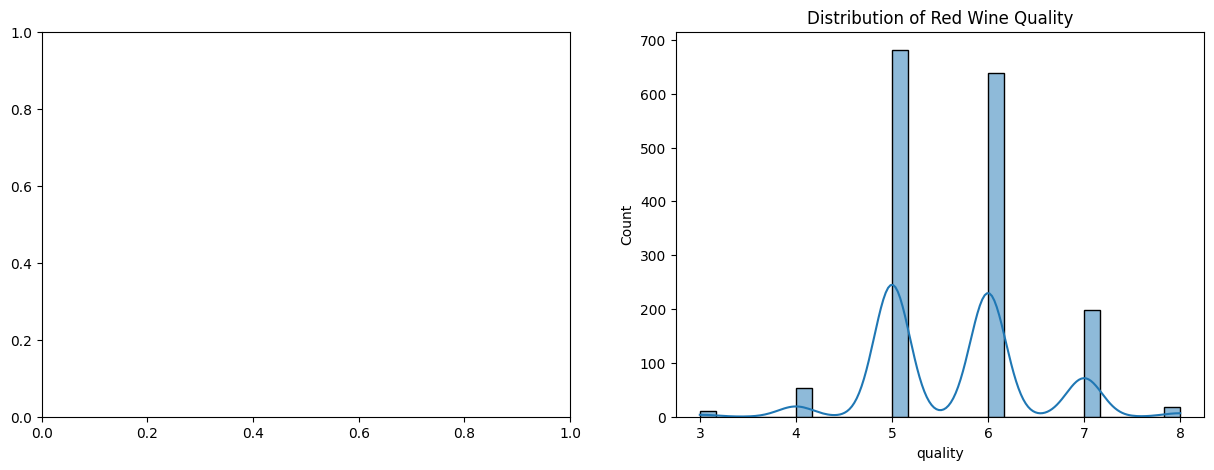

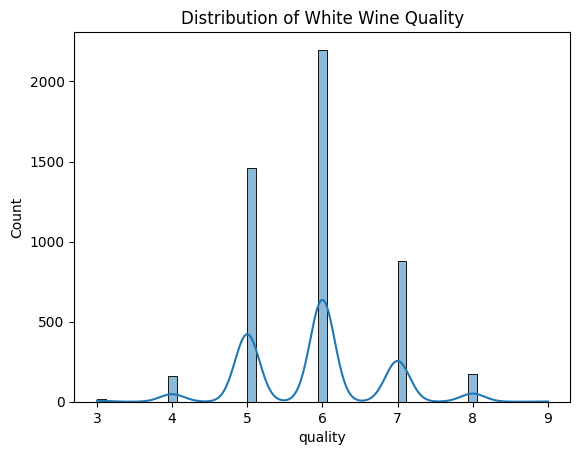

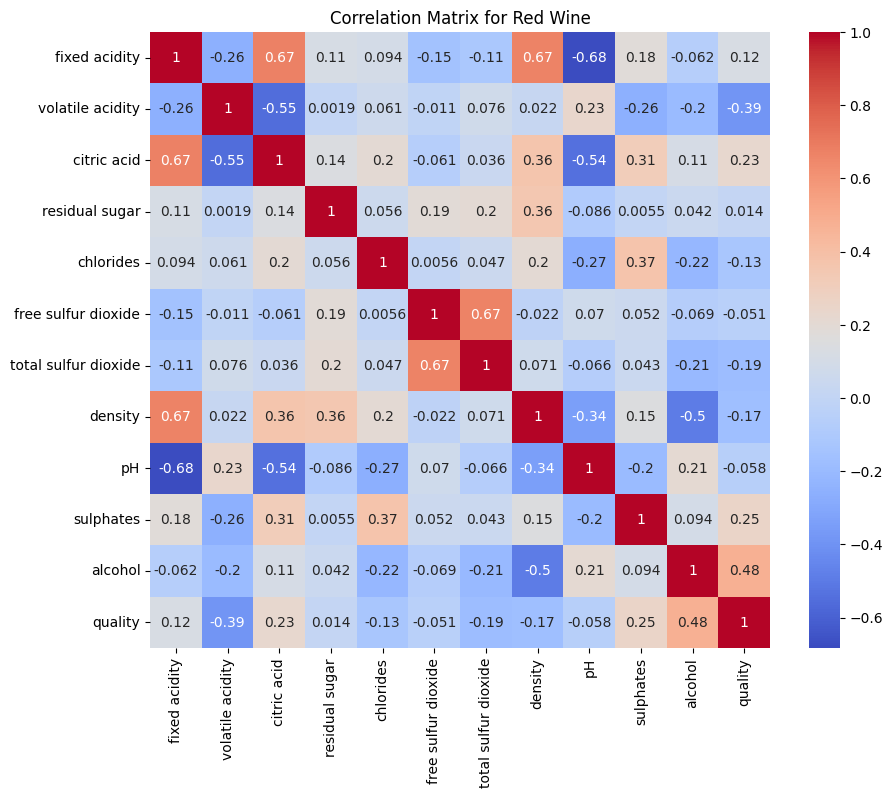

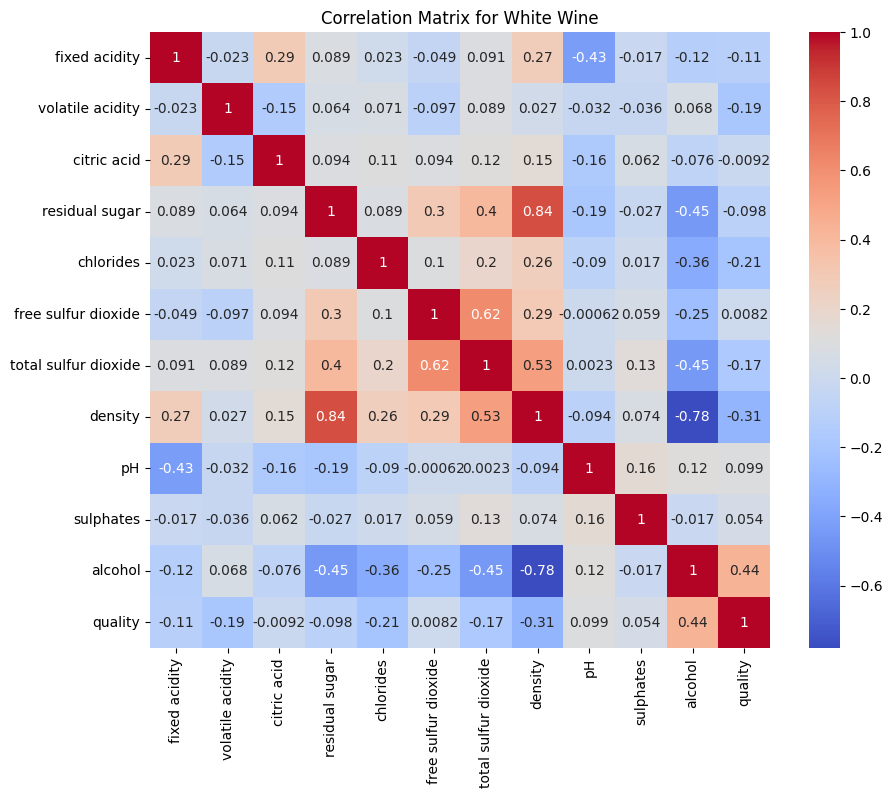

In [12]:
# EXPLORATORY DATA ANALYSIS

# Summary statistics for wines
print("\nRed Wine Summary Statistics:")
print(red_wine_data.describe())
print("\nWhite Wine Summary Statistics:")
print(white_wine_data.describe())

# Visualize the distribution of quality for both datasets
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualizations for red wine
sns.histplot(red_wine_data['quality'], kde=True)
plt.title('Distribution of Red Wine Quality')
plt.savefig('red_wine_quality_distribution.png')  # Save the plot as an image
plt.show()

# Visualizations for white wine
sns.histplot(white_wine_data['quality'], kde=True)
plt.title('Distribution of White Wine Quality')
plt.savefig('white_wine_quality_distribution.png')  # Save the plot as an image
plt.show()

# Correlation matrix for red wine
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Red Wine')
plt.savefig('red_wine_correlation_matrix.png')  # Save the plot as an image
plt.show()

# Correlation matrix for white wine
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for White Wine')
plt.savefig('white_wine_correlation_matrix.png')  # Save the plot as an image
plt.show()


In [6]:
# DATA PREPROCESSING

# Check for missing values
print("Red Wine Missing Values:\n", red_wine_data.isnull().sum())
print("\nWhite Wine Missing Values:\n", white_wine_data.isnull().sum())

# Standardize the features
scaler = StandardScaler()

# Scale the red wine features
red_scaled_features = scaler.fit_transform(red_wine_data.drop('quality', axis=1))
red_scaled_features_df = pd.DataFrame(red_scaled_features, columns=red_wine_data.columns[:-1])

# Scale the white wine features
white_scaled_features = scaler.fit_transform(white_wine_data.drop('quality', axis=1))
white_scaled_features_df = pd.DataFrame(white_scaled_features, columns=white_wine_data.columns[:-1])

Red Wine Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White Wine Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# MODELING

# Split the red wine data
X_red = red_scaled_features_df
y_red = red_wine_data['quality']
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Split the white wine data
X_white = white_scaled_features_df
y_white = white_wine_data['quality']
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Train a Random Forest model on red wine data
rf_red_model = RandomForestClassifier()
rf_red_model.fit(X_red_train, y_red_train)

# Predict and evaluate on red wine data
y_red_pred = rf_red_model.predict(X_red_test)
print("Red Wine Accuracy:", accuracy_score(y_red_test, y_red_pred))
print(classification_report(y_red_test, y_red_pred))

# Train a Random Forest model on white wine data
rf_white_model = RandomForestClassifier()
rf_white_model.fit(X_white_train, y_white_train)

# Predict and evaluate on white wine data
y_white_pred = rf_white_model.predict(X_white_test)
print("White Wine Accuracy:", accuracy_score(y_white_test, y_white_pred))
print(classification_report(y_white_test, y_white_pred))

Red Wine Accuracy: 0.65
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.72      0.72       130
           6       0.61      0.71      0.66       132
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.63       320



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

White Wine Accuracy: 0.7122448979591837
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.73      0.32      0.44        25
           5       0.73      0.69      0.71       291
           6       0.67      0.82      0.74       432
           7       0.80      0.61      0.69       192
           8       0.94      0.46      0.62        35

    accuracy                           0.71       980
   macro avg       0.65      0.48      0.53       980
weighted avg       0.72      0.71      0.71       980



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

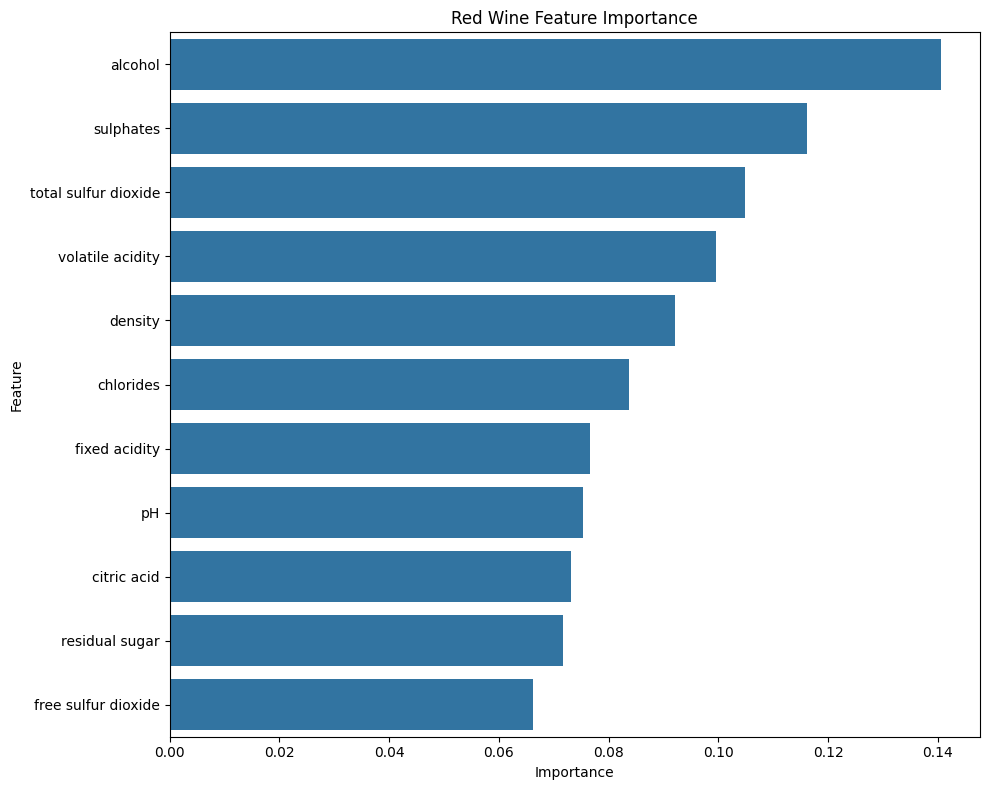

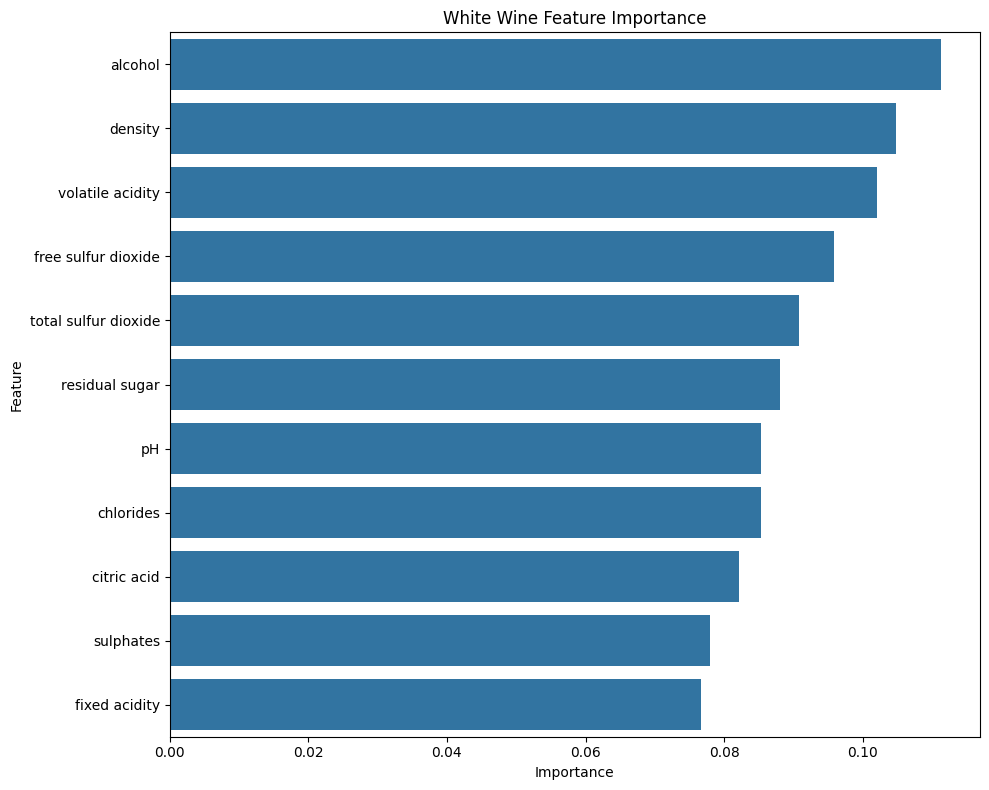

In [14]:
# MODEL INTERPRETATION

# Feature importance for red wine
red_importances = rf_red_model.feature_importances_
red_feature_importance_df = pd.DataFrame({'Feature': X_red.columns, 'Importance': red_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=red_feature_importance_df)
plt.title('Red Wine Feature Importance')
plt.tight_layout()
plt.savefig('red_wine_feature_importance.png')  # Save the figure
plt.show()

# Feature importance for white wine
white_importances = rf_white_model.feature_importances_
white_feature_importance_df = pd.DataFrame({'Feature': X_white.columns, 'Importance': white_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=white_feature_importance_df)
plt.title('White Wine Feature Importance')
plt.tight_layout()
plt.savefig('white_wine_feature_importance.png')  # Save the figure
plt.show()

In [9]:
# CONCLUSION
print("\nConclusion")
print("The Random Forest model achieved an accuracy of", accuracy_score(y_red_test, y_red_pred), "for predicting red wine quality and", accuracy_score(y_white_test, y_white_pred), "for predicting white wine quality. The most important features influencing the prediction were:")
print("Red Wine:", red_feature_importance_df['Feature'].head(3).values)
print("White Wine:", white_feature_importance_df['Feature'].head(3).values)



Conclusion
The Random Forest model achieved an accuracy of 0.65 for predicting red wine quality and 0.7122448979591837 for predicting white wine quality. The most important features influencing the prediction were:
Red Wine: ['alcohol' 'sulphates' 'total sulfur dioxide']
White Wine: ['alcohol' 'density' 'volatile acidity']
